In [1]:
import pandas as pd
import numpy as np
from dfply import *
from datetime import *
import matplotlib.pyplot as plt

### Data Merge: Assuming sum all columns

In [2]:
@make_symbolic
def transfer_format(series):
    return pd.to_datetime(series).apply(lambda x:x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S') if x.replace(minute=0).hour != 0 else x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S').replace("00","24",1))
@make_symbolic
def sum_row(series):
    return series.sum(axis=1)

path_newapp="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - new.app4.csv"
newapp=pd.read_csv(path_newapp)
path_USAAL="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv"
main=pd.read_csv(path_USAAL)

df_dfply=(main>>
    rename(time="Date/Time")>>
    left_join((newapp>>
    transmute(Electricity_newapp=X.W_min/1000,
       time=transfer_format(X.time))>>
   group_by(X.time)>>
   summarize(Electricity_app=X.Electricity_newapp.sum())),by='time')>>
#     select(X.time,contains("Electricity"),-1)>>
    mutate(total_Electricity=sum_row(X)))

df_dfply

,time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_app,total_Electricity
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,11.035430
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,11.496637
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,11.757447
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,11.885034
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,12.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.230105
8756,12/31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.920653
8757,12/31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.441100
8758,12/31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN,4.086723


In [3]:
path_newapp="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - new.app4.csv"
path_USAAL="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv"
newapp=pd.read_csv(path_newapp)
newapp.loc[:,"Electricity_newapp"]=newapp.loc[:,"W_min"]/1000
newapp=newapp.drop(columns=["W_min"])
newapp.time=pd.to_datetime(newapp.time)
newapp.time=newapp.time.apply(lambda x:x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S') if x.replace(minute=0).hour != 0 else x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S').replace("00","24",1))
newapp_final=newapp.drop(columns=["Unnamed: 0"]).groupby(["time"]).sum()
main=pd.read_csv(path_USAAL).set_index("Date/Time")
merged=main.join(newapp_final,how="left")
merged.loc[:,"total_Electricity"]=merged.sum(axis=1)
merged.index=[datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1],"%Y/%m/%d %H:%M:%S")  if x.split()[1][:2] !="24" else datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1].replace("24","00",1),"%Y/%m/%d %H:%M:%S") for x in merged.index.to_list()]
df_pandas=merged.copy()
df_pandas
# merged

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,11.035430
2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,11.496637
2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,11.757447
2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,11.885034
2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,12.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.230105
2013-12-31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.920653
2013-12-31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.441100
2013-12-31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN,4.086723


### Data Merge: Assuming sum only columns labeled Electricity

In [4]:
@make_symbolic
def transfer_format(series):
    return pd.to_datetime(series).apply(lambda x:x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S') if x.replace(minute=0).hour != 0 else x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S').replace("00","24",1))
@make_symbolic
def sum_row(series):
    return series.sum(axis=1)

path_newapp="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - new.app4.csv"
newapp=pd.read_csv(path_newapp)
path_USAAL="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv"
main=pd.read_csv(path_USAAL)
df_dfply_e=(main>>
    rename(time="Date/Time")>>
    left_join((newapp>>
    transmute(Electricity_newapp=X.W_min/1000,
       time=transfer_format(X.time))>>
   group_by(X.time)>>
   summarize(Electricity_app=X.Electricity_newapp.sum())),by='time')>>
    select(X.time,contains("Electricity"),-1)>>
    mutate(total_Electricity=sum_row(X))
         )
df_dfply_e

,time,Electricity:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_app,total_Electricity
0,01/01 01:00:00,0.974334,0.0,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,2.157443
1,01/01 02:00:00,0.796582,0.0,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,1.821755
2,01/01 03:00:00,0.735028,0.0,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,1.707610
3,01/01 04:00:00,0.727433,0.0,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,1.695004
4,01/01 05:00:00,0.778706,0.0,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,1.805868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,2.601121,0.0,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.185598
8756,12/31 21:00:00,2.445630,0.0,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.874615
8757,12/31 22:00:00,2.206391,0.0,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.396137
8758,12/31 23:00:00,1.769166,0.0,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN,3.534973


In [5]:
path_newapp="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - new.app4.csv"
path_USAAL="C:/Users/Aaron/Desktop/OA/nov2020_homework-main/nov2020_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv"
newapp=pd.read_csv(path_newapp)
newapp.loc[:,"Electricity_newapp"]=newapp.loc[:,"W_min"]/1000
newapp=newapp.drop(columns=["W_min"])
newapp.time=pd.to_datetime(newapp.time)
newapp.time=newapp.time.apply(lambda x:x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S') if x.replace(minute=0).hour != 0 else x.replace(minute=0).strftime(format=' %m/%d  %H:%M:%S').replace("00","24",1))
newapp_final=newapp.drop(columns=["Unnamed: 0"]).groupby(["time"]).sum()
main=pd.read_csv(path_USAAL).set_index("Date/Time")
merged=main.join(newapp_final,how="left")
merged.loc[:,"total_Electricity"]=merged.loc[:,[x for x in main.columns.to_list() if "Electricity" in x]+["Electricity_newapp"]].sum(axis=1)
merged.index=[datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1],"%Y/%m/%d %H:%M:%S")  if x.split()[1][:2] !="24" else datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1].replace("24","00",1),"%Y/%m/%d %H:%M:%S") for x in merged.index.to_list()]
df_pandas_e=merged.copy()
df_pandas_e

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,2.157443
2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,1.821755
2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,1.707610
2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,1.695004
2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,1.805868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.185598
2013-12-31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.874615
2013-12-31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.396137
2013-12-31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN,3.534973


### Plot

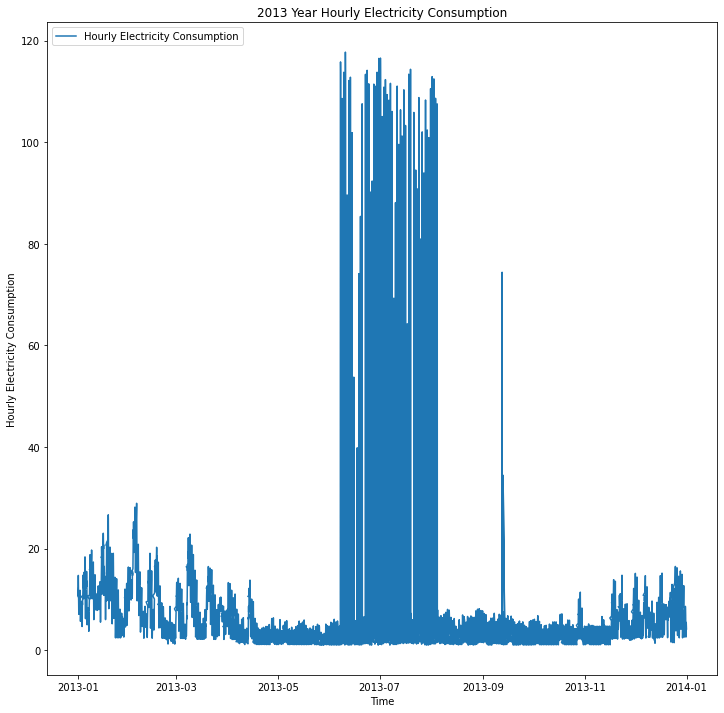

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(df_pandas.loc[:,"total_Electricity"],label="Hourly Electricity Consumption")
ax.set(title="2013 Year Hourly Electricity Consumption",
xlabel="Time",
ylabel="Hourly Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

### Abnormality

In [7]:
df=df_dfply.copy().set_index("time")
df=df.loc[df.total_Electricity>20,:]
ab_i=df.index
ab_i

Index([' 01/15  07:00:00', ' 01/15  08:00:00', ' 01/16  04:00:00',
       ' 01/16  05:00:00', ' 01/16  06:00:00', ' 01/16  07:00:00',
       ' 01/16  08:00:00', ' 01/16  09:00:00', ' 01/16  11:00:00',
       ' 01/18  07:00:00',
       ...
       ' 08/03  12:00:00', ' 08/03  13:00:00', ' 08/04  03:00:00',
       ' 08/04  11:00:00', ' 08/04  12:00:00', ' 09/12  07:00:00',
       ' 09/12  08:00:00', ' 09/12  09:00:00', ' 09/12  10:00:00',
       ' 09/13  24:00:00'],
      dtype='object', name='time', length=235)

In [8]:
n_i=newapp_final.index
n_i

Index([' 06/07  11:00:00', ' 06/07  12:00:00', ' 06/07  13:00:00',
       ' 06/07  14:00:00', ' 06/07  15:00:00', ' 06/07  16:00:00',
       ' 06/07  17:00:00', ' 06/07  18:00:00', ' 06/07  19:00:00',
       ' 06/07  20:00:00',
       ...
       ' 09/17  14:00:00', ' 09/17  15:00:00', ' 09/17  16:00:00',
       ' 09/17  17:00:00', ' 09/17  18:00:00', ' 09/17  19:00:00',
       ' 09/17  20:00:00', ' 09/17  21:00:00', ' 09/17  22:00:00',
       ' 09/17  23:00:00'],
      dtype='object', name='time', length=245)

In [9]:
#Overlap between new appliance and abnormality 
ab_i.intersection(n_i).size/n_i.size

0.6244897959183674

In [10]:
# all abnormalities happen within the period of new application
ab_i.intersection(n_i).size/ab_i.size

0.6510638297872341

In [11]:
mask=(df_pandas.index.date>=date(2013, 9, 12)) & (df_pandas.index.date<=date(2013, 9, 13))

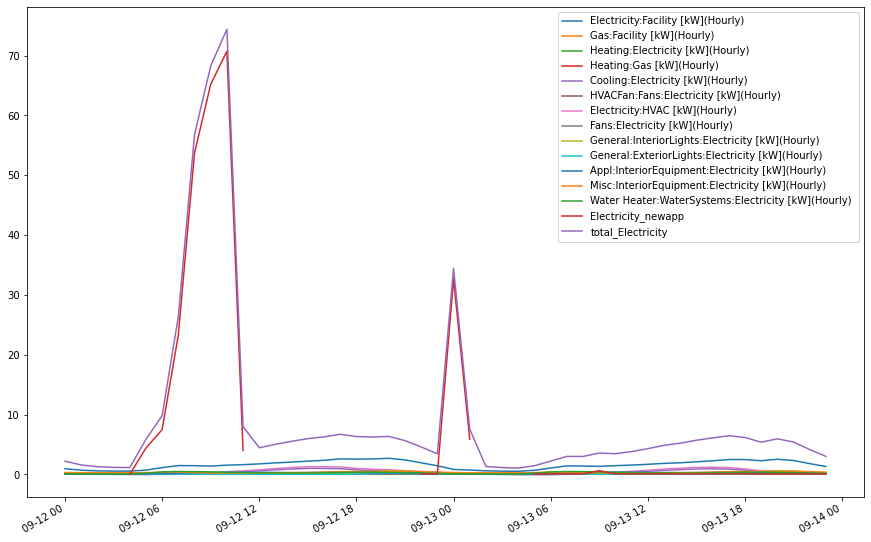

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
df_pandas.loc[mask,:].plot(ax=ax)

In [13]:
temp_main=main.copy()
temp_main.loc[:,"SumWithoutNew"]=temp_main.sum(axis=1)
temp_main.index=[datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1],"%Y/%m/%d %H:%M:%S")  if x.split()[1][:2] !="24" else datetime.strptime("2013/"+x.split()[0]+" "+x.split()[1].replace("24","00",1),"%Y/%m/%d %H:%M:%S") for x in temp_main.index.to_list()]


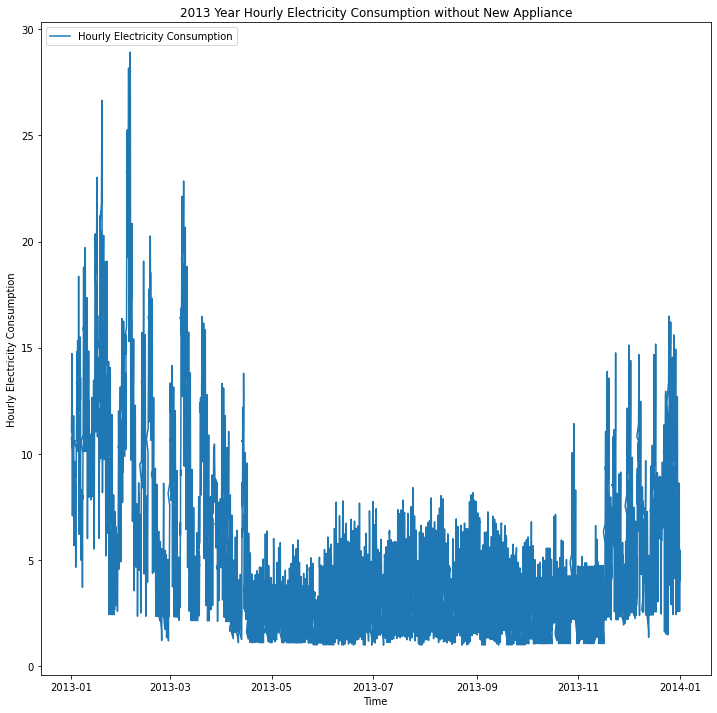

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(temp_main.index,temp_main.SumWithoutNew,label="Hourly Electricity Consumption")
ax.set(title="2013 Year Hourly Electricity Consumption without New Appliance",
xlabel="Time",
ylabel="Hourly Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

In [15]:
newapp_final.describe()

,Electricity_newapp
count,245.000000
mean,47.823110
std,42.118029
min,0.003673
25%,1.054541
50%,44.752200
75%,90.544438
max,114.513788


### monthly

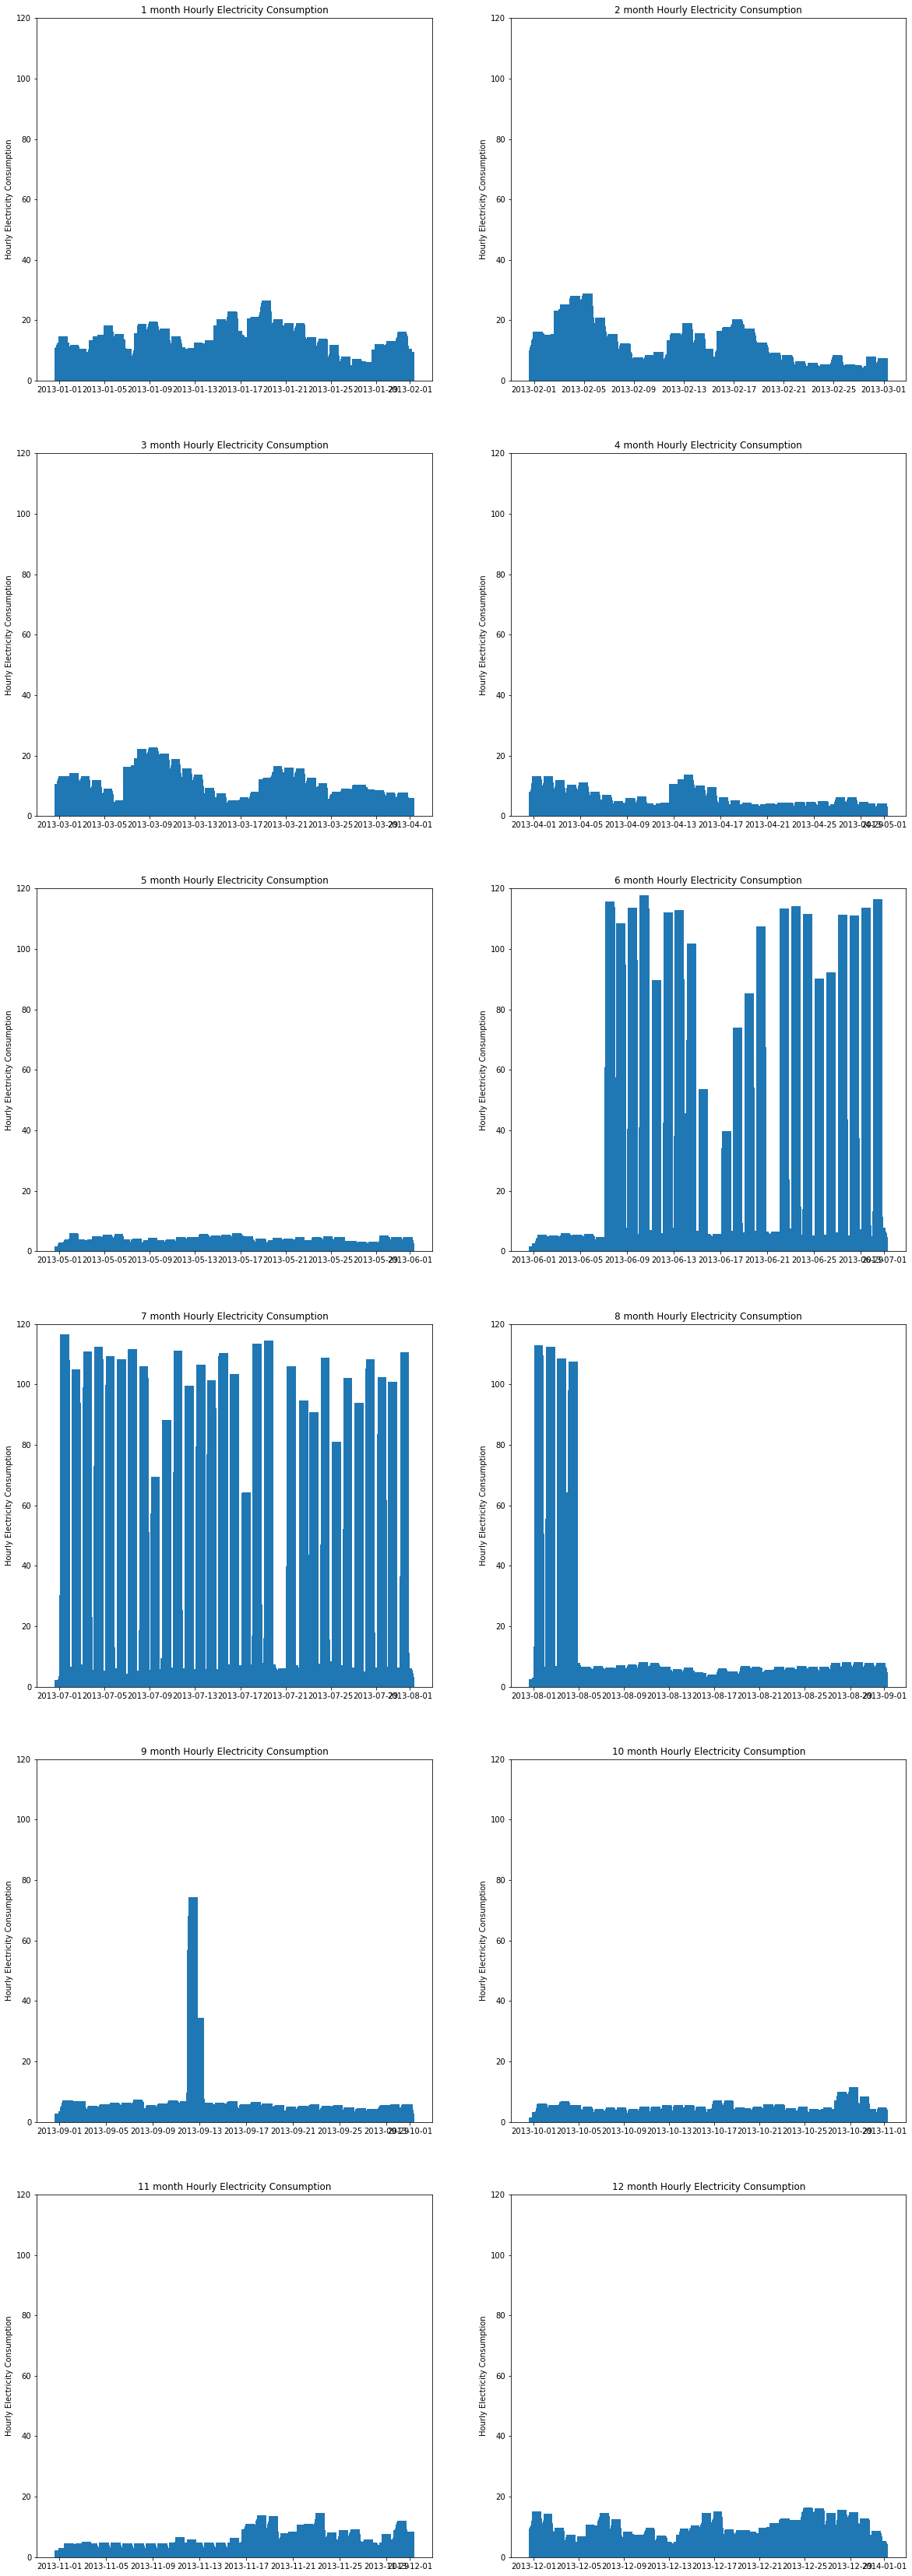

In [16]:
fig = plt.figure(figsize=(20,60))
for month in range(1,13):
    ax = fig.add_subplot(6,2,month)
    mask=df_pandas.index.month==month
    ax.set(title="{} month Hourly Electricity Consumption".format(month),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(df_pandas.loc[mask,"total_Electricity"].index,height=df_pandas.loc[mask,"total_Electricity"],label="{}".format(month))
    

In [17]:
df1=df_pandas.copy()
# df1=df1.loc[:,[x for x in df1.columns.to_list() if "Electricity" in x]]
temp=df1.groupby(df1.index.month).sum()
temp

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
1,1176.792528,2777.487816,0.0,2754.349606,0.000000,69.730702,69.730702,69.730702,199.737627,43.028790,182.773922,335.924276,331.819077,0.000000,8011.105746
2,1025.297059,2056.145785,0.0,2035.138190,0.000000,51.397283,51.397283,51.397283,157.623694,33.956329,164.939671,304.991659,299.943655,0.000000,6232.227893
3,1036.168230,1884.488682,0.0,1864.195170,0.000000,47.407780,47.407780,47.407780,147.343889,31.741786,187.695084,294.624495,313.577061,0.000000,5902.057735
4,915.411861,514.266298,0.0,494.666189,5.111611,14.163565,19.275176,14.163565,116.621089,25.123281,182.959876,284.557556,273.541203,0.000000,2859.861270
5,898.332911,74.046297,0.0,53.752784,48.566114,15.970631,64.536746,15.970631,104.406748,22.491985,177.077982,294.624495,221.416819,0.000000,1991.194146
6,1085.472084,17.234913,0.0,0.000000,253.690297,75.035485,328.725782,75.035485,94.042906,20.259339,178.119412,250.219255,200.771709,4412.405215,6991.011881
7,1161.527418,17.729278,0.0,0.000000,304.599754,90.743780,395.343533,90.743780,99.669871,21.471537,185.477440,257.396523,188.390378,6025.125411,8838.218701
8,1151.485765,17.729278,0.0,0.000000,334.867249,98.323485,433.190733,98.323485,111.587517,24.038914,161.141285,257.396523,150.352658,1006.746244,3845.183135
9,1075.703537,17.234913,0.0,0.000000,212.274243,64.033350,276.307593,64.033350,130.080539,28.022801,178.775036,250.219255,198.964632,272.385018,2768.034268
10,1002.344278,151.466763,0.0,131.874408,60.488456,22.015649,82.504105,22.015649,161.695144,34.833429,186.115663,284.444971,238.972829,0.000000,2378.771345


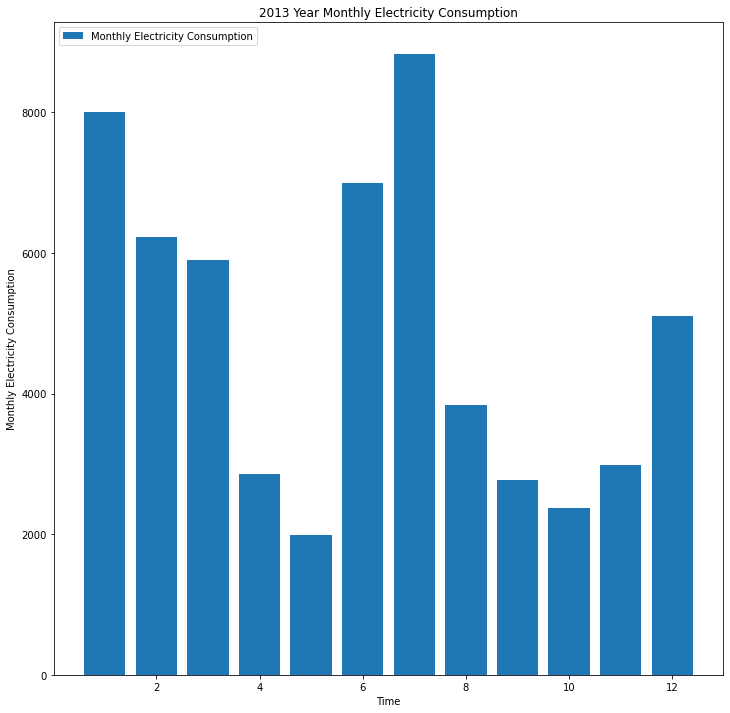

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(temp.index,height=temp.total_Electricity,label="Monthly Electricity Consumption")
ax.set(title="2013 Year Monthly Electricity Consumption",
xlabel="Time",
ylabel="Monthly Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

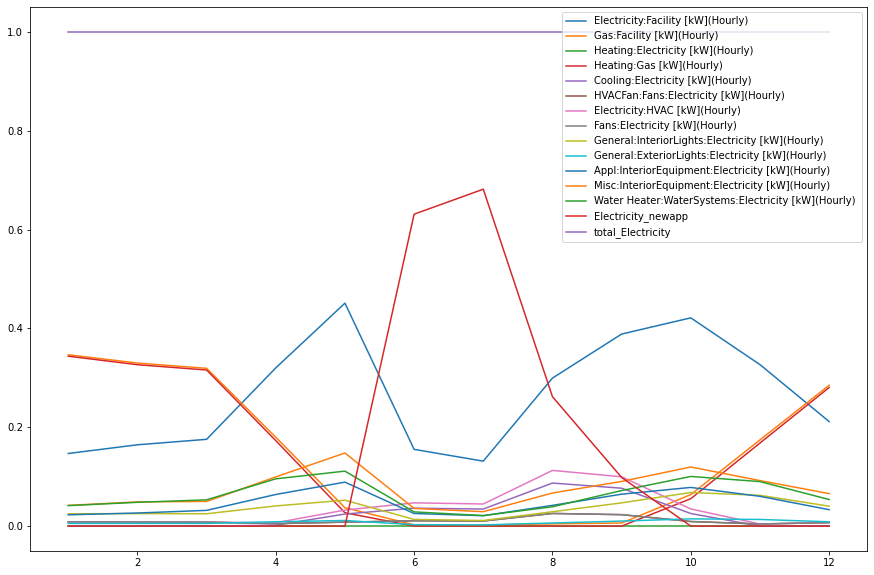

In [19]:
#the new appliance contributes a lot to the total electricity from june
df1_div=temp.divide(temp.total_Electricity, axis=0)
fig, ax = plt.subplots(figsize=(15,10))
df1_div.groupby(df1_div.index).sum().plot(ax=ax)

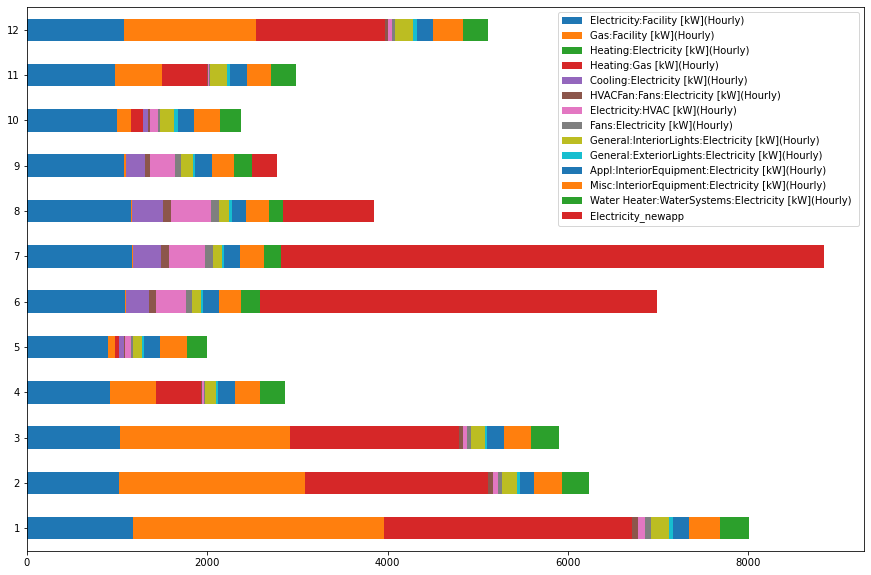

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(df1.index.month).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

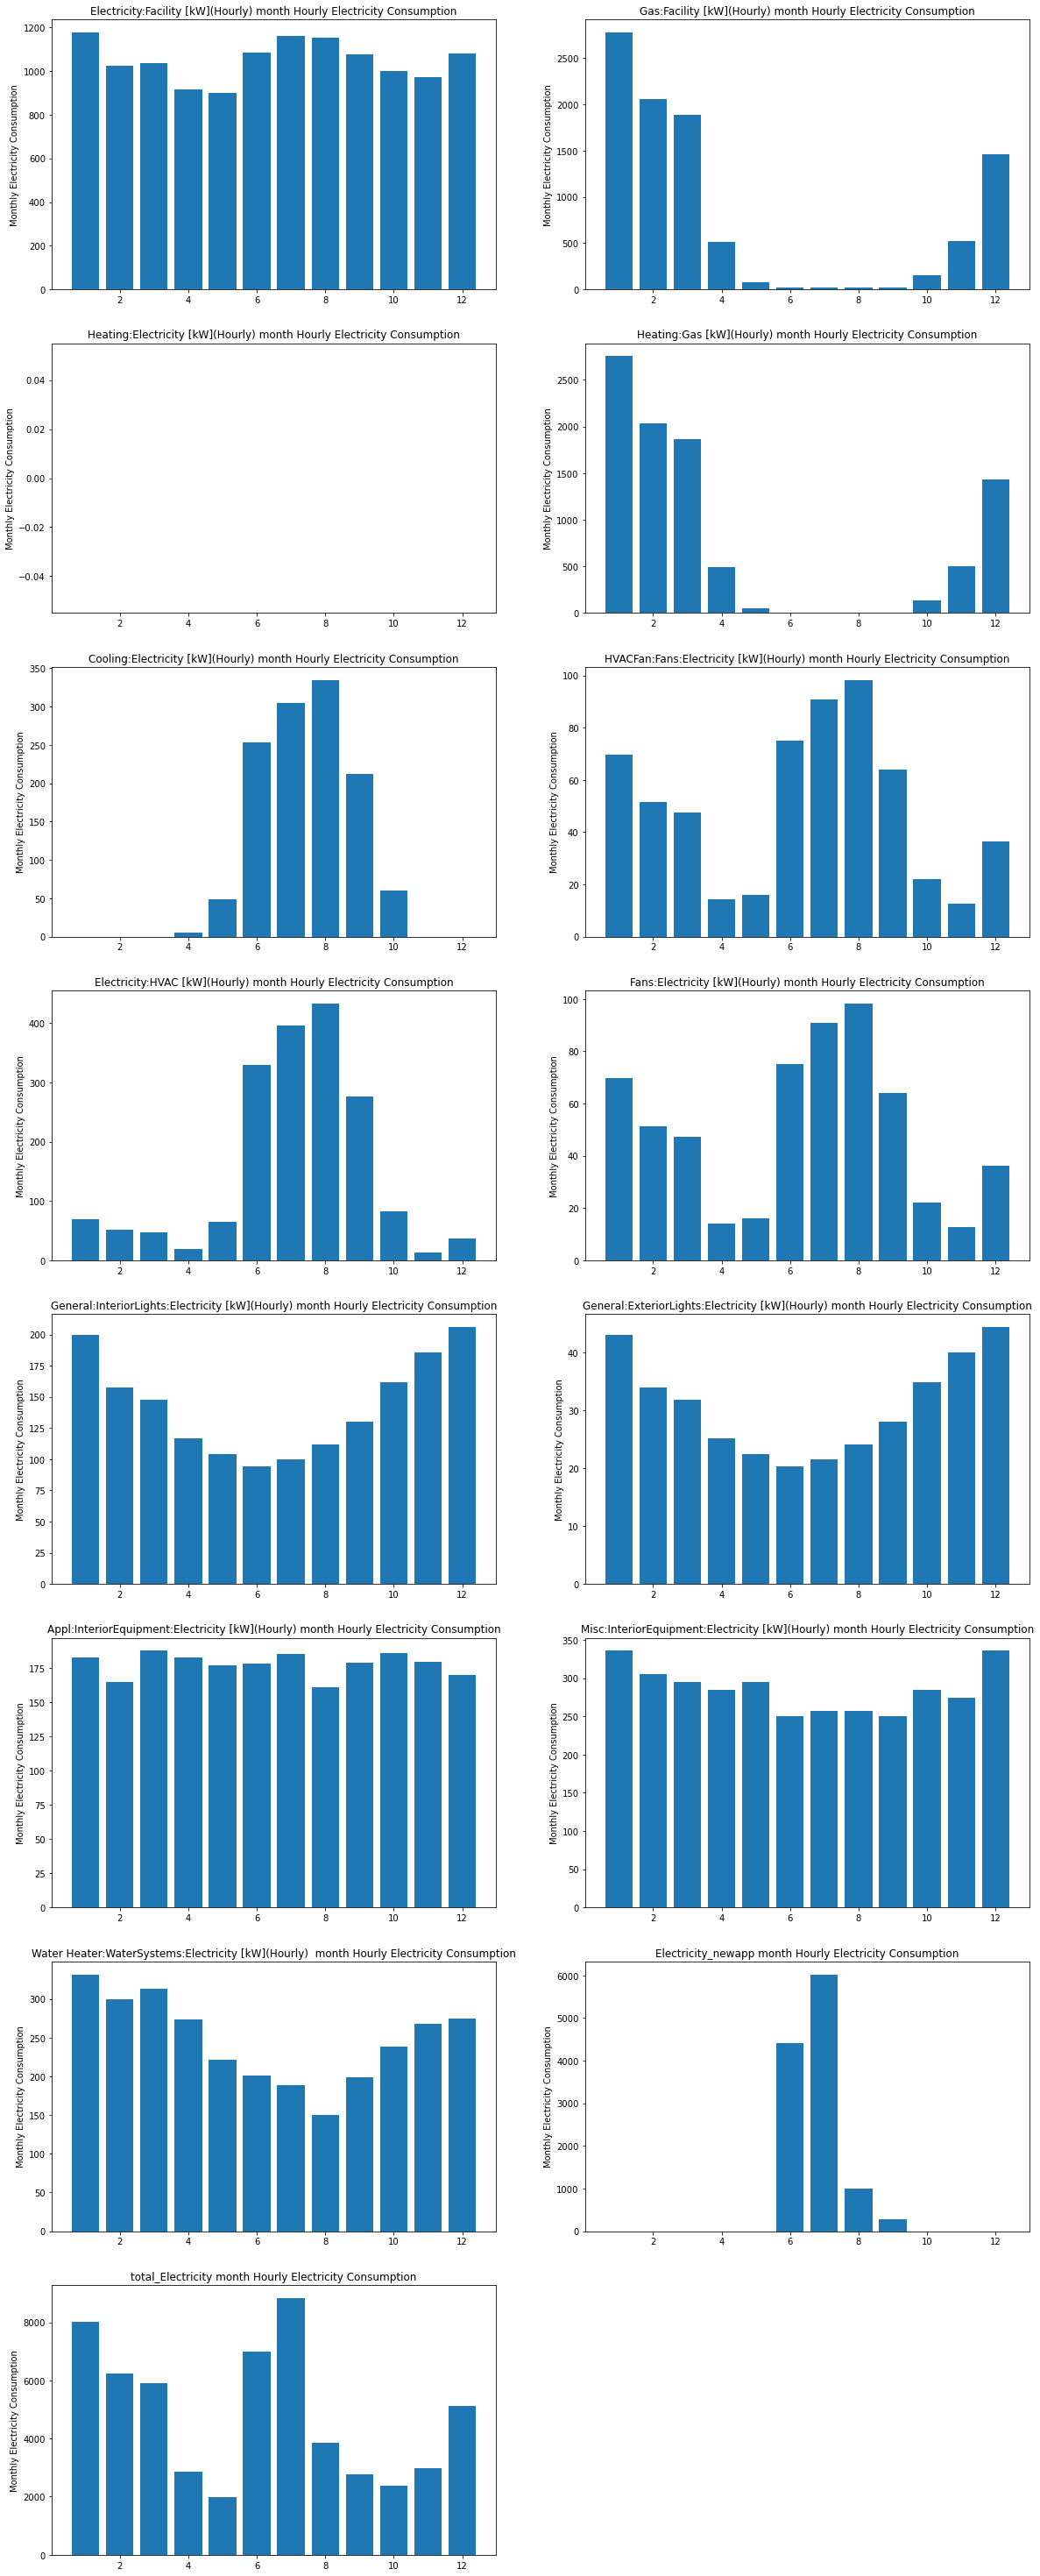

In [25]:
# fig, ax = plt.subplots(figsize=(20,40))
df1_sum=df1.groupby(df1.index.month).sum()
fig = plt.figure(figsize=(20,60))
for col in range(len(df1_sum.columns.to_list())):
    ax = fig.add_subplot(9,2,col+1)
    name=df1_sum.columns.to_list()[col]
    ax.set(title="{} month Hourly Electricity Consumption".format(name),
        ylabel="Monthly Electricity Consumption")
#     ax.set_ylim(0,5000)
    ax.bar(df1_sum.iloc[:,col].index,height=df1_sum.iloc[:,col],label="{}".format(name))
    

In [26]:
df1_sum

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
1,1176.792528,2777.487816,0.0,2754.349606,0.000000,69.730702,69.730702,69.730702,199.737627,43.028790,182.773922,335.924276,331.819077,0.000000,8011.105746
2,1025.297059,2056.145785,0.0,2035.138190,0.000000,51.397283,51.397283,51.397283,157.623694,33.956329,164.939671,304.991659,299.943655,0.000000,6232.227893
3,1036.168230,1884.488682,0.0,1864.195170,0.000000,47.407780,47.407780,47.407780,147.343889,31.741786,187.695084,294.624495,313.577061,0.000000,5902.057735
4,915.411861,514.266298,0.0,494.666189,5.111611,14.163565,19.275176,14.163565,116.621089,25.123281,182.959876,284.557556,273.541203,0.000000,2859.861270
5,898.332911,74.046297,0.0,53.752784,48.566114,15.970631,64.536746,15.970631,104.406748,22.491985,177.077982,294.624495,221.416819,0.000000,1991.194146
6,1085.472084,17.234913,0.0,0.000000,253.690297,75.035485,328.725782,75.035485,94.042906,20.259339,178.119412,250.219255,200.771709,4412.405215,6991.011881
7,1161.527418,17.729278,0.0,0.000000,304.599754,90.743780,395.343533,90.743780,99.669871,21.471537,185.477440,257.396523,188.390378,6025.125411,8838.218701
8,1151.485765,17.729278,0.0,0.000000,334.867249,98.323485,433.190733,98.323485,111.587517,24.038914,161.141285,257.396523,150.352658,1006.746244,3845.183135
9,1075.703537,17.234913,0.0,0.000000,212.274243,64.033350,276.307593,64.033350,130.080539,28.022801,178.775036,250.219255,198.964632,272.385018,2768.034268
10,1002.344278,151.466763,0.0,131.874408,60.488456,22.015649,82.504105,22.015649,161.695144,34.833429,186.115663,284.444971,238.972829,0.000000,2378.771345


In [27]:
pie=df1_div.groupby(df1_div.index).sum()

In [28]:
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = pie.columns[:-1]
# sizes = pie.iloc[1,:-1].to_list()
# # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=False, startangle=180,rotatelabels=True)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

### Weekday

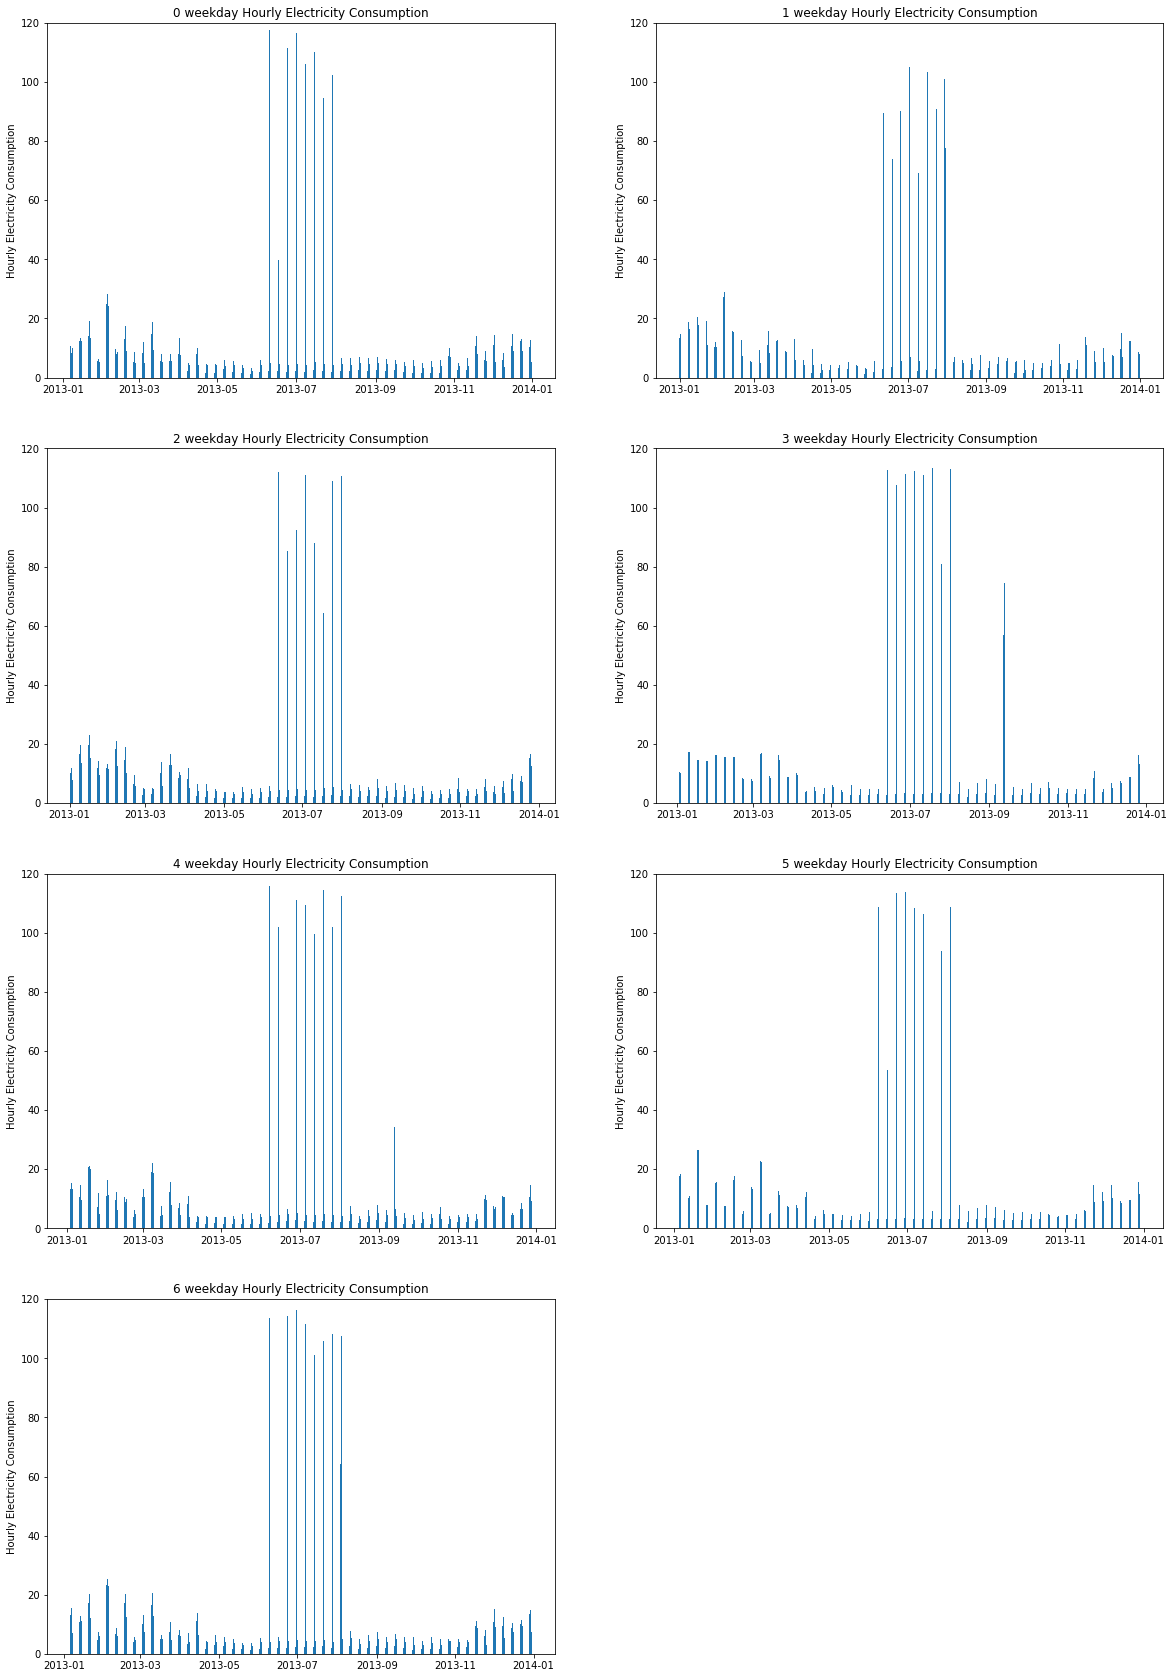

In [35]:
fig = plt.figure(figsize=(20,30))
for weekday in range(7):
    ax = fig.add_subplot(4,2,weekday+1)
    mask=df_pandas.index.weekday==weekday
    ax.set(title="{} weekday Hourly Electricity Consumption".format(weekday),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(df_pandas.loc[mask,"total_Electricity"].index,height=df_pandas.loc[mask,"total_Electricity"],label="{}".format(weekday))


In [36]:
df2=df_pandas.copy()
temp=df2.groupby(df2.index.weekday).sum()
temp

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
0,1824.333275,1298.596983,0.0,1265.011198,168.990172,82.639622,251.629794,82.639622,243.716256,52.502954,323.751230,487.603867,442.017462,2008.675748,8532.108182
1,1877.332375,1519.851518,0.0,1485.461824,175.713510,90.329127,266.042636,90.329127,251.039360,54.080545,330.163352,499.275136,453.175177,1164.977139,8257.770826
2,1772.652638,1347.726808,0.0,1314.082216,175.718628,85.259137,260.977765,85.259137,243.874540,52.537052,294.783893,488.457633,408.910043,1314.780039,7845.019530
3,1785.611307,1137.125502,0.0,1103.480910,179.696054,81.623911,261.319965,81.623911,244.258980,52.619871,297.885845,488.457633,417.957301,1965.327493,8096.988681
4,1773.122087,1299.978964,0.0,1266.428721,168.858507,82.069457,250.927963,82.069457,243.533118,52.463501,298.057960,487.087854,417.939978,1747.113668,8169.651234
5,1782.833584,1438.166650,0.0,1404.696539,174.722078,87.474229,262.196307,87.474229,243.299922,52.413264,297.934954,485.924480,417.952945,1629.443144,8364.532326
6,1766.568225,1462.146124,0.0,1428.556461,175.898775,88.453528,264.352303,88.453528,244.501522,52.672121,291.621863,487.660159,402.648546,1886.344657,8639.877813


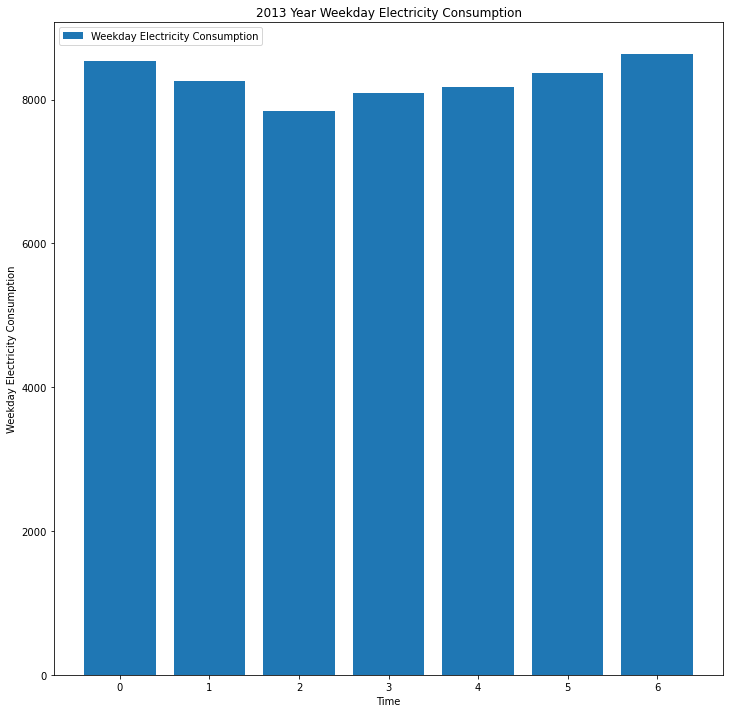

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(temp.index,height=temp.total_Electricity,label="Weekday Electricity Consumption")
ax.set(title="2013 Year Weekday Electricity Consumption",
xlabel="Time",
ylabel="Weekday Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

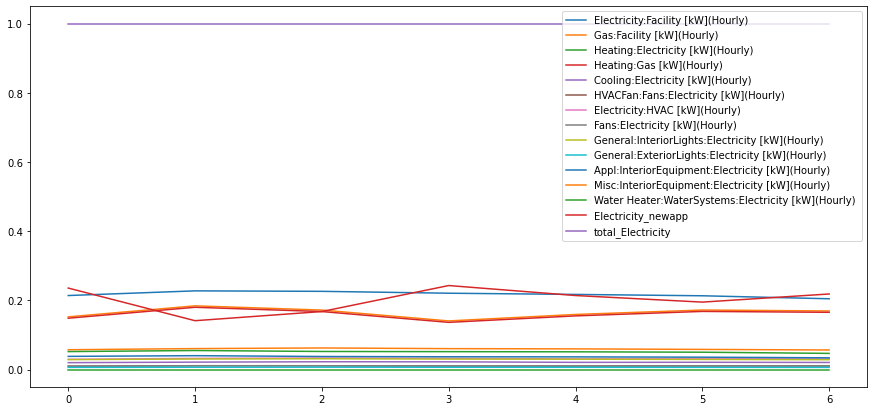

In [38]:
#the new appliance contributes a lot to the total electricity from june
df2_div=temp.divide(temp.total_Electricity, axis=0)
fig, ax = plt.subplots(figsize=(15,7))
df2_div.groupby(df2_div.index).sum().plot(ax=ax)

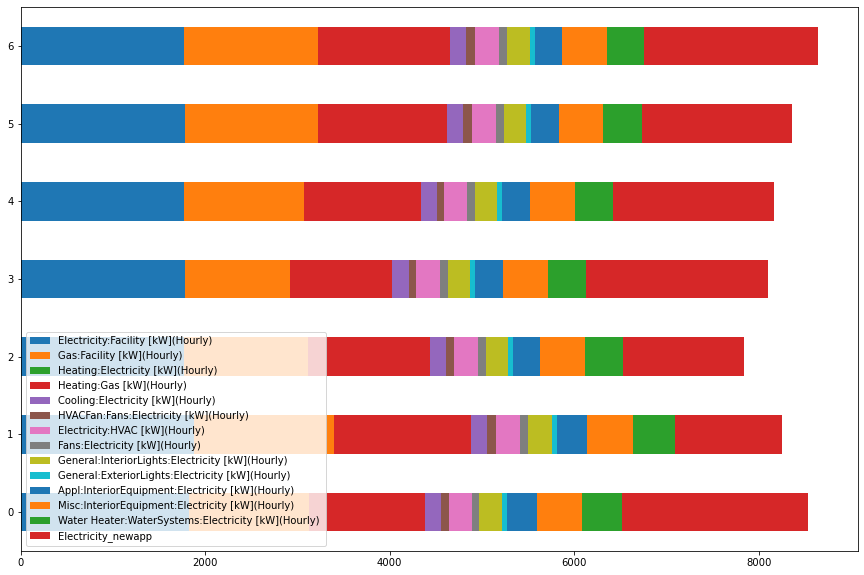

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
df2.groupby(df2.index.weekday).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

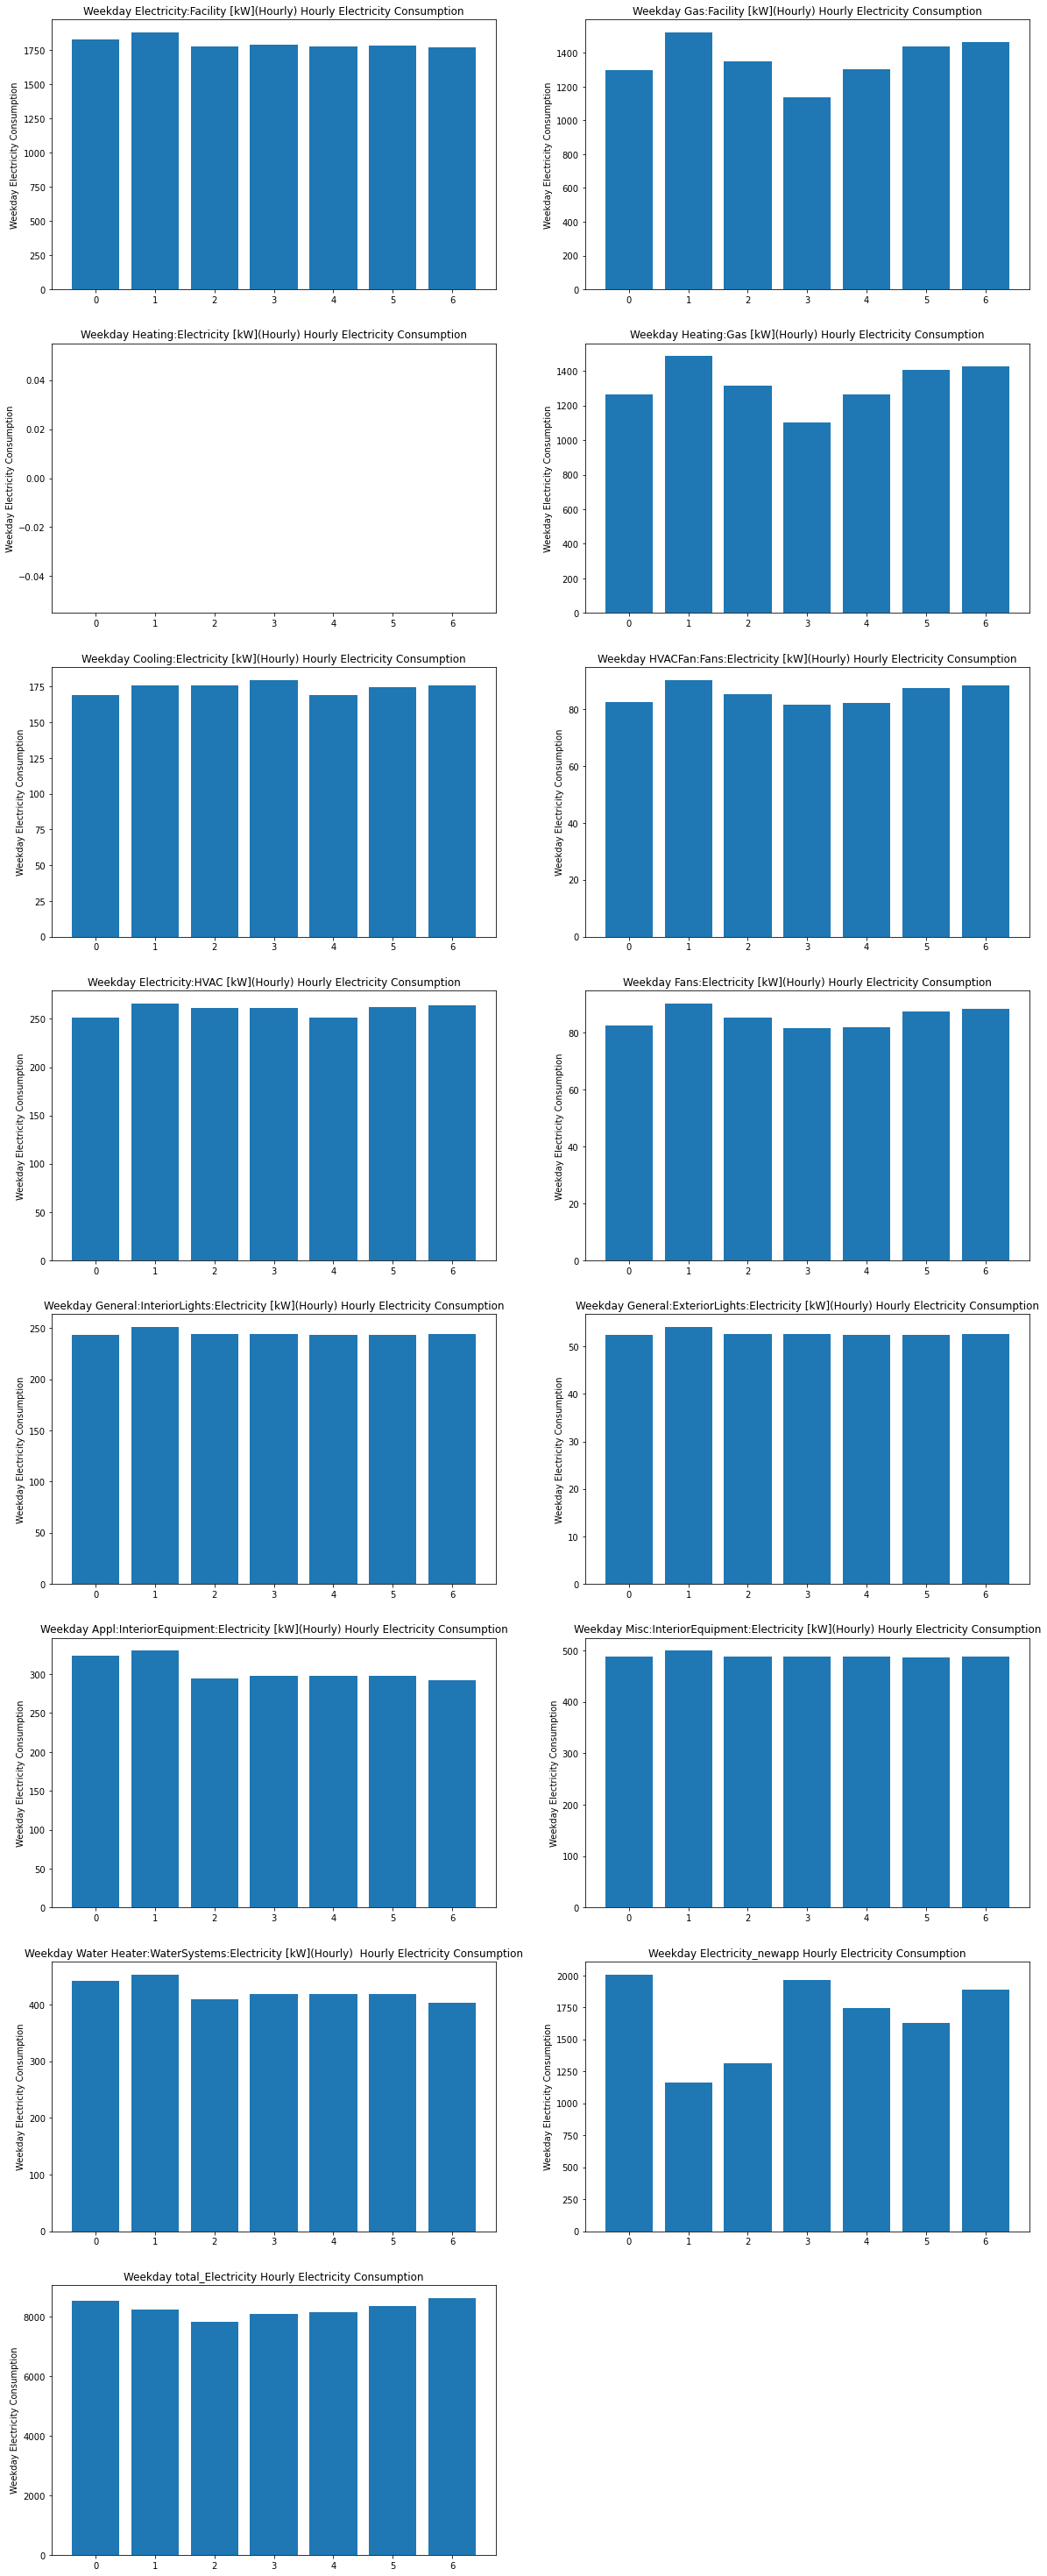

In [40]:
df2_sum=df2.groupby(df2.index.weekday).sum()
fig = plt.figure(figsize=(20,60))
for col in range(len(df2_sum.columns.to_list())):
    ax = fig.add_subplot(9,2,col+1)
    name=df1_sum.columns.to_list()[col]
    ax.set(title="Weekday {} Hourly Electricity Consumption".format(name),
        ylabel="Weekday Electricity Consumption")
    ax.bar(df2_sum.iloc[:,col].index,height=df2_sum.iloc[:,col],label="{}".format(name))

### Hour

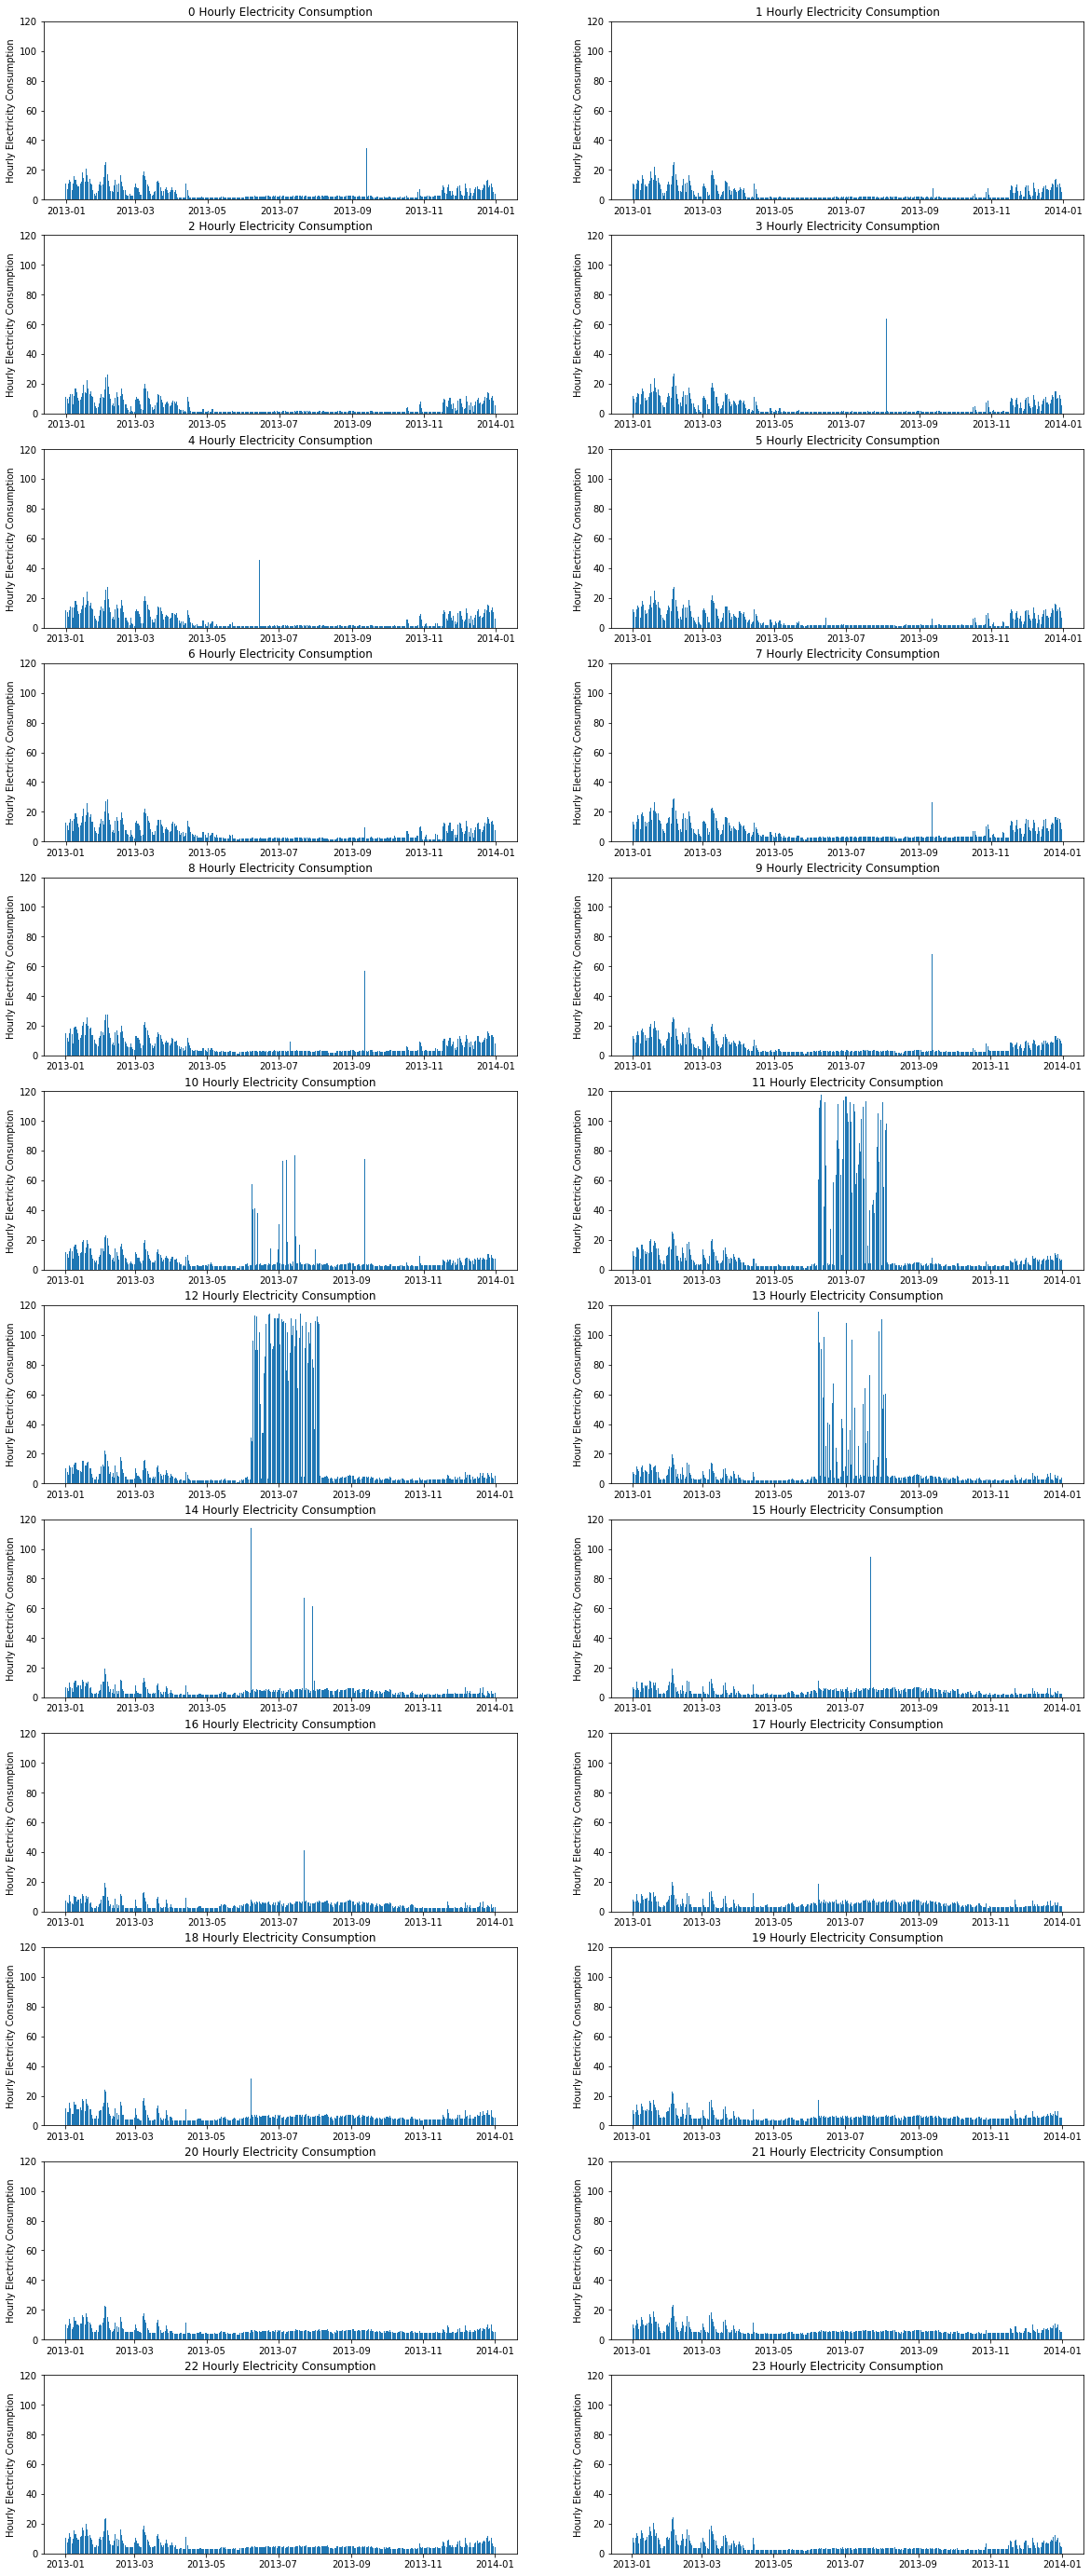

In [41]:
fig = plt.figure(figsize=(20,50))
for hour in range(24):
    ax = fig.add_subplot(12,2,hour+1)
    mask=df_pandas.index.hour==hour
    ax.set(title="{} Hourly Electricity Consumption".format(hour),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(df_pandas.loc[mask,"total_Electricity"].index,height=df_pandas.loc[mask,"total_Electricity"],label="{}".format(hour))


In [42]:
df3=df_pandas.copy()
temp=df3.groupby(df3.index.hour).sum()
temp

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_newapp,total_Electricity
0,385.598632,414.756697,0.0,405.064927,21.449249,17.091875,38.541124,17.091875,78.015352,16.806580,42.413893,140.706687,63.039935,32.806374,1673.383201
1,280.729800,490.853755,0.0,482.392320,14.247630,16.775622,31.023251,16.775622,43.017857,9.267188,31.478809,122.844486,37.023148,6.025905,1582.455393
2,236.434053,553.933331,0.0,545.846401,9.730742,16.943517,26.674260,16.943517,26.981857,5.812608,26.672830,117.407365,26.810073,0.072452,1610.263007
3,222.008550,607.906610,0.0,599.924178,7.043478,17.438699,24.482177,17.438699,22.432410,4.832537,23.129652,115.890230,25.166484,62.723171,1750.416875
4,225.201972,648.831074,0.0,641.062086,5.330367,17.913419,23.243786,17.913419,22.432410,4.832537,24.020042,112.791428,31.806709,44.826201,1820.205450
5,269.320924,682.130681,0.0,674.024392,5.421726,18.754490,24.176216,18.754490,23.230984,5.004571,28.205697,117.688424,64.939973,9.995548,1941.648116
6,391.152368,696.334837,0.0,687.108048,7.706826,19.777153,27.483979,19.777153,32.439034,6.988229,41.033921,133.956008,143.176137,7.558180,2214.491872
7,538.085192,689.407518,0.0,679.238067,12.411746,20.969837,33.381583,20.969837,59.624060,12.844605,65.241123,147.641728,210.127034,23.430152,2513.372482
8,581.191490,596.746119,0.0,587.161178,15.943901,19.567136,35.511036,19.567136,71.243905,15.347829,90.322755,139.155719,221.210185,60.184780,2453.153169
9,549.690942,499.431087,0.0,491.300770,23.182553,19.197371,42.379924,19.197371,52.550297,11.320730,113.036749,118.037267,206.290914,65.889025,2211.505000


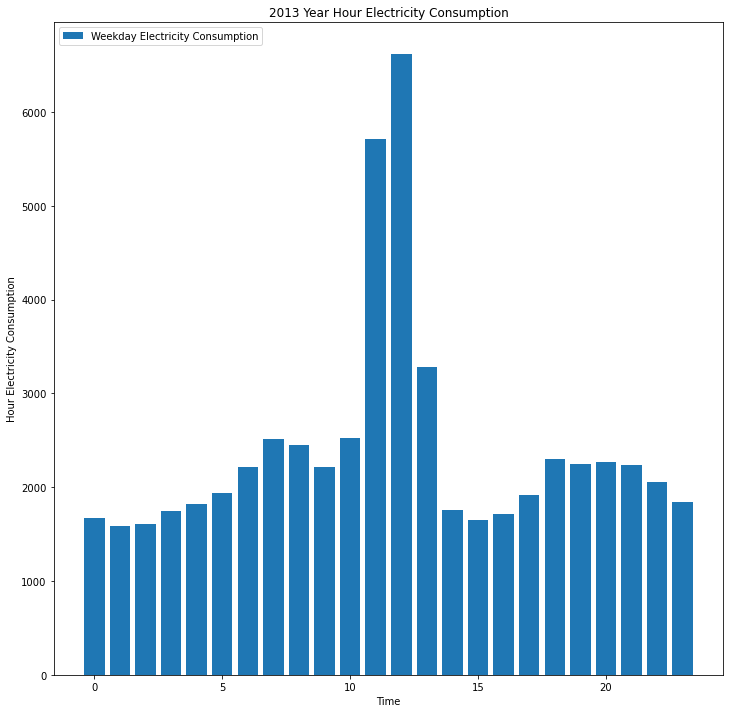

In [43]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(temp.index,height=temp.total_Electricity,label="Weekday Electricity Consumption")
ax.set(title="2013 Year Hour Electricity Consumption",
xlabel="Time",
ylabel="Hour Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

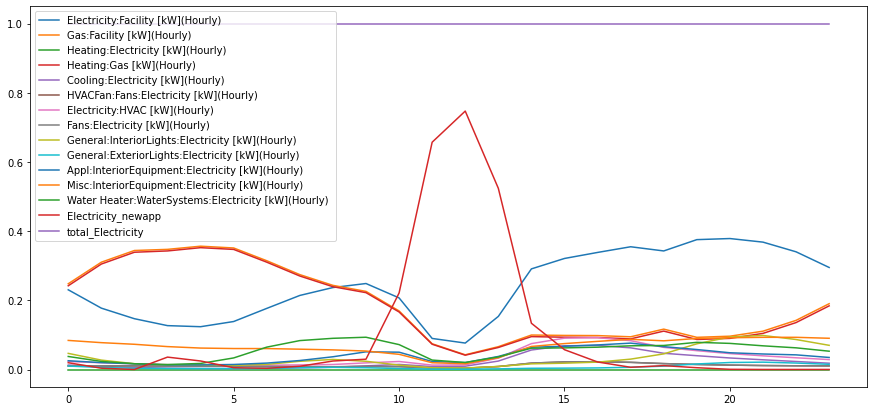

In [44]:
df3_div=temp.divide(temp.total_Electricity, axis=0)
fig, ax = plt.subplots(figsize=(15,7))
df3_div.groupby(df3_div.index).sum().plot(ax=ax)

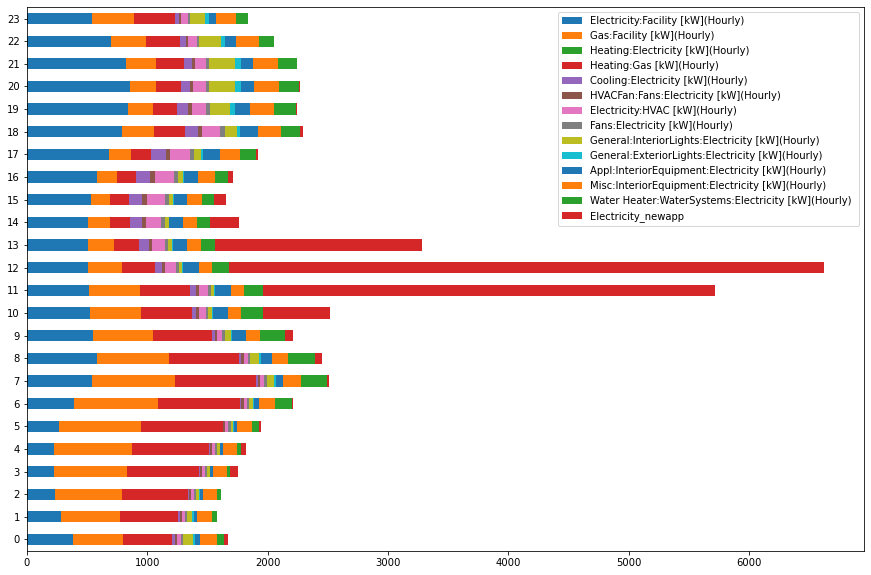

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
df3.groupby(df3.index.hour).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

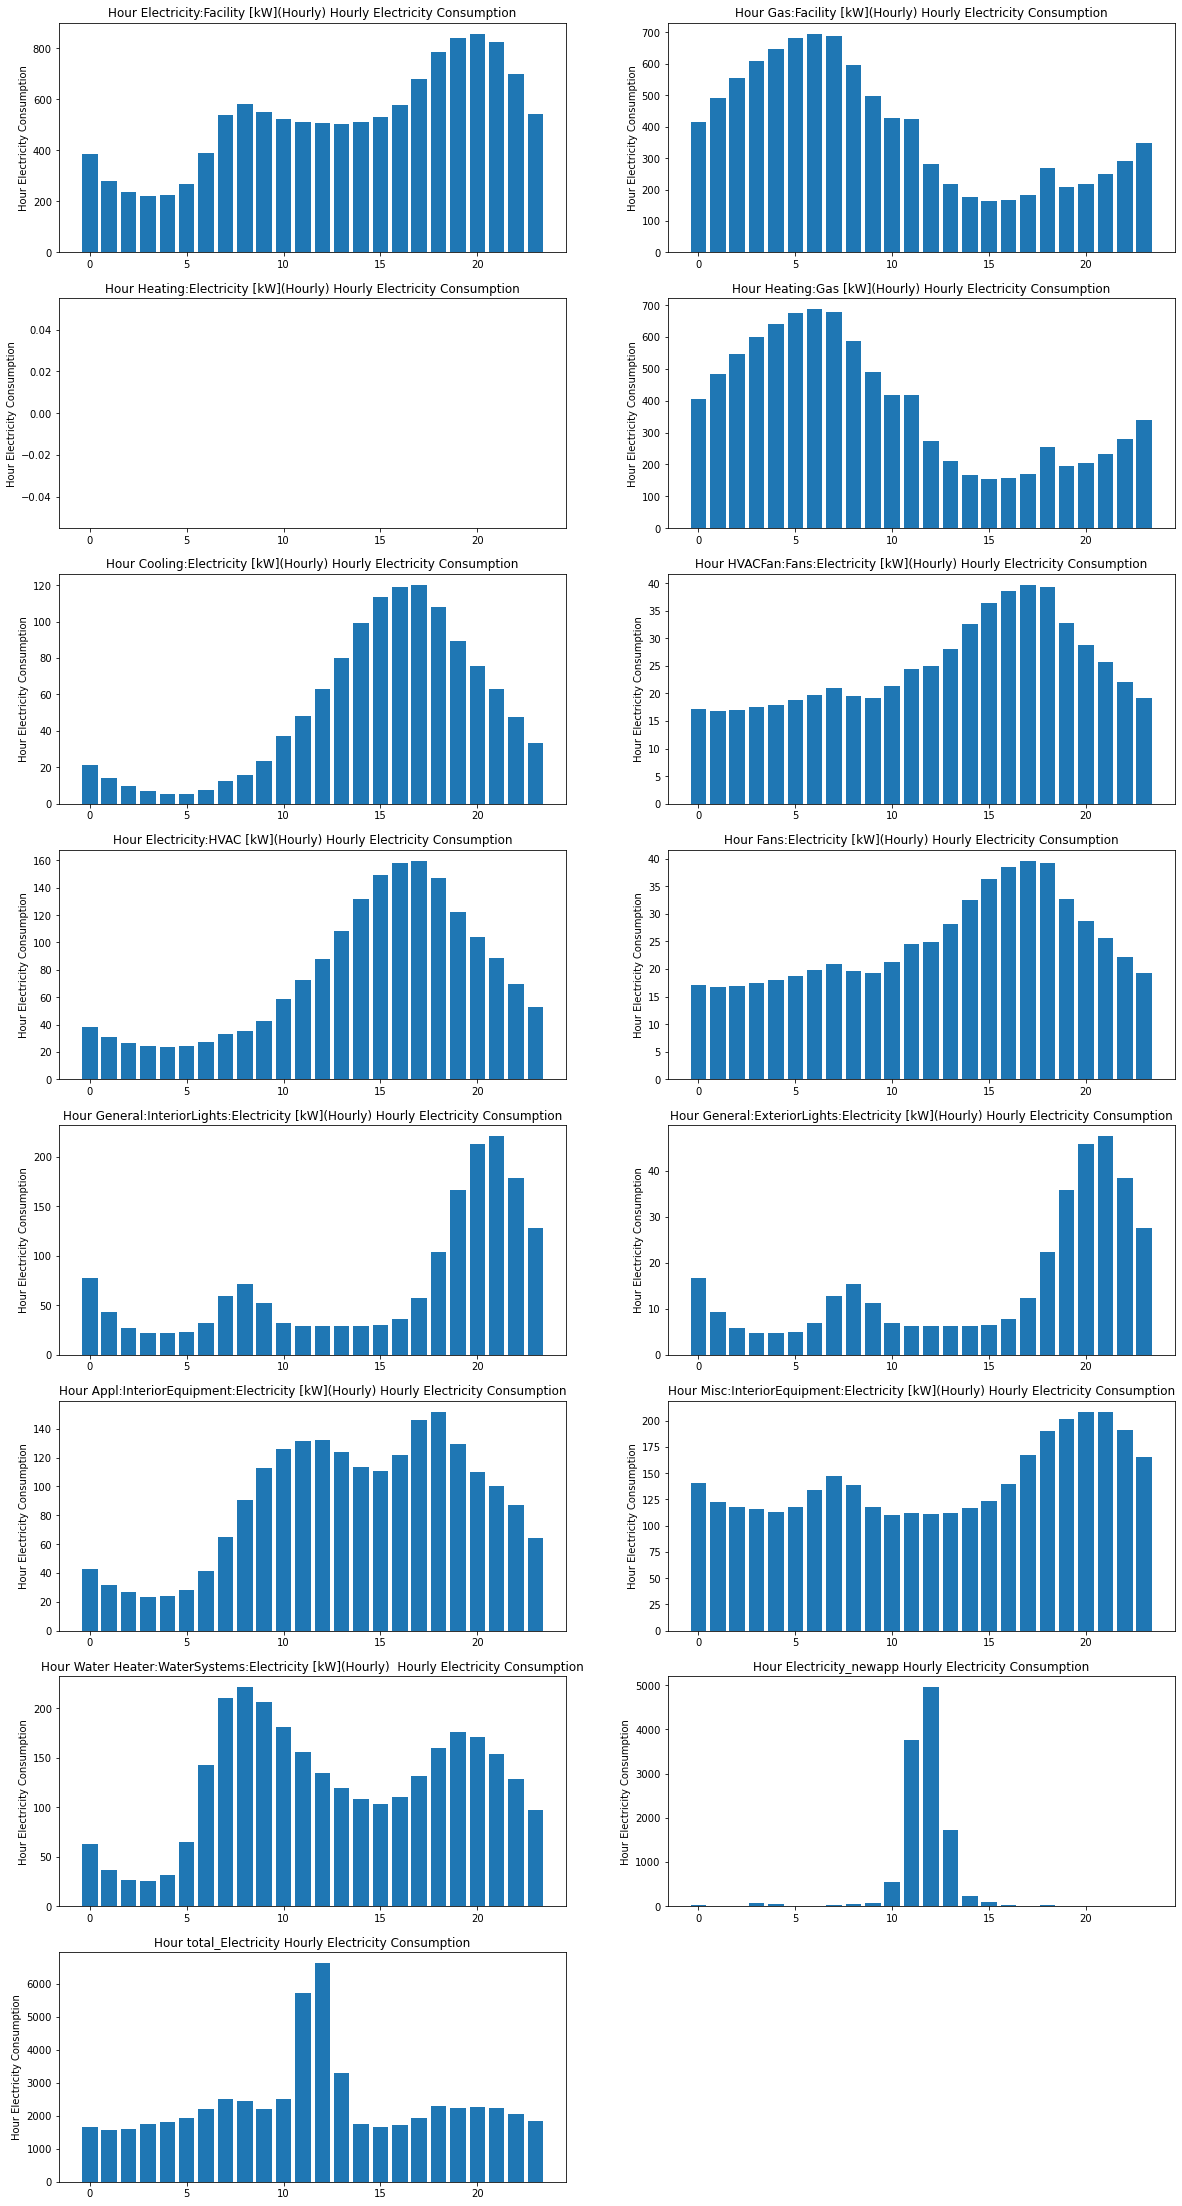

In [46]:
df3_sum=df3.groupby(df3.index.hour).sum()
fig = plt.figure(figsize=(20,60))
for col in range(len(df3_sum.columns.to_list())):
    ax = fig.add_subplot(12,2,col+1)
    name=df3_sum.columns.to_list()[col]
    ax.set(title="Hour {} Hourly Electricity Consumption".format(name),
        ylabel="Hour Electricity Consumption")
    ax.bar(df3_sum.iloc[:,col].index,height=df3_sum.iloc[:,col],label="{}".format(name))